<a href="https://colab.research.google.com/github/vidhya2324/githubsample1/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [ ]:
pdata = pd.read_csv("/content/archive (5).zip")

In [16]:
pdata.shape # Check number of columns and rows in data frame

(253680, 22)

In [17]:
pdata.head() # To check first 5 rows of data set

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [18]:
pdata.isnull().values.any() # If there are any null values in data set

False

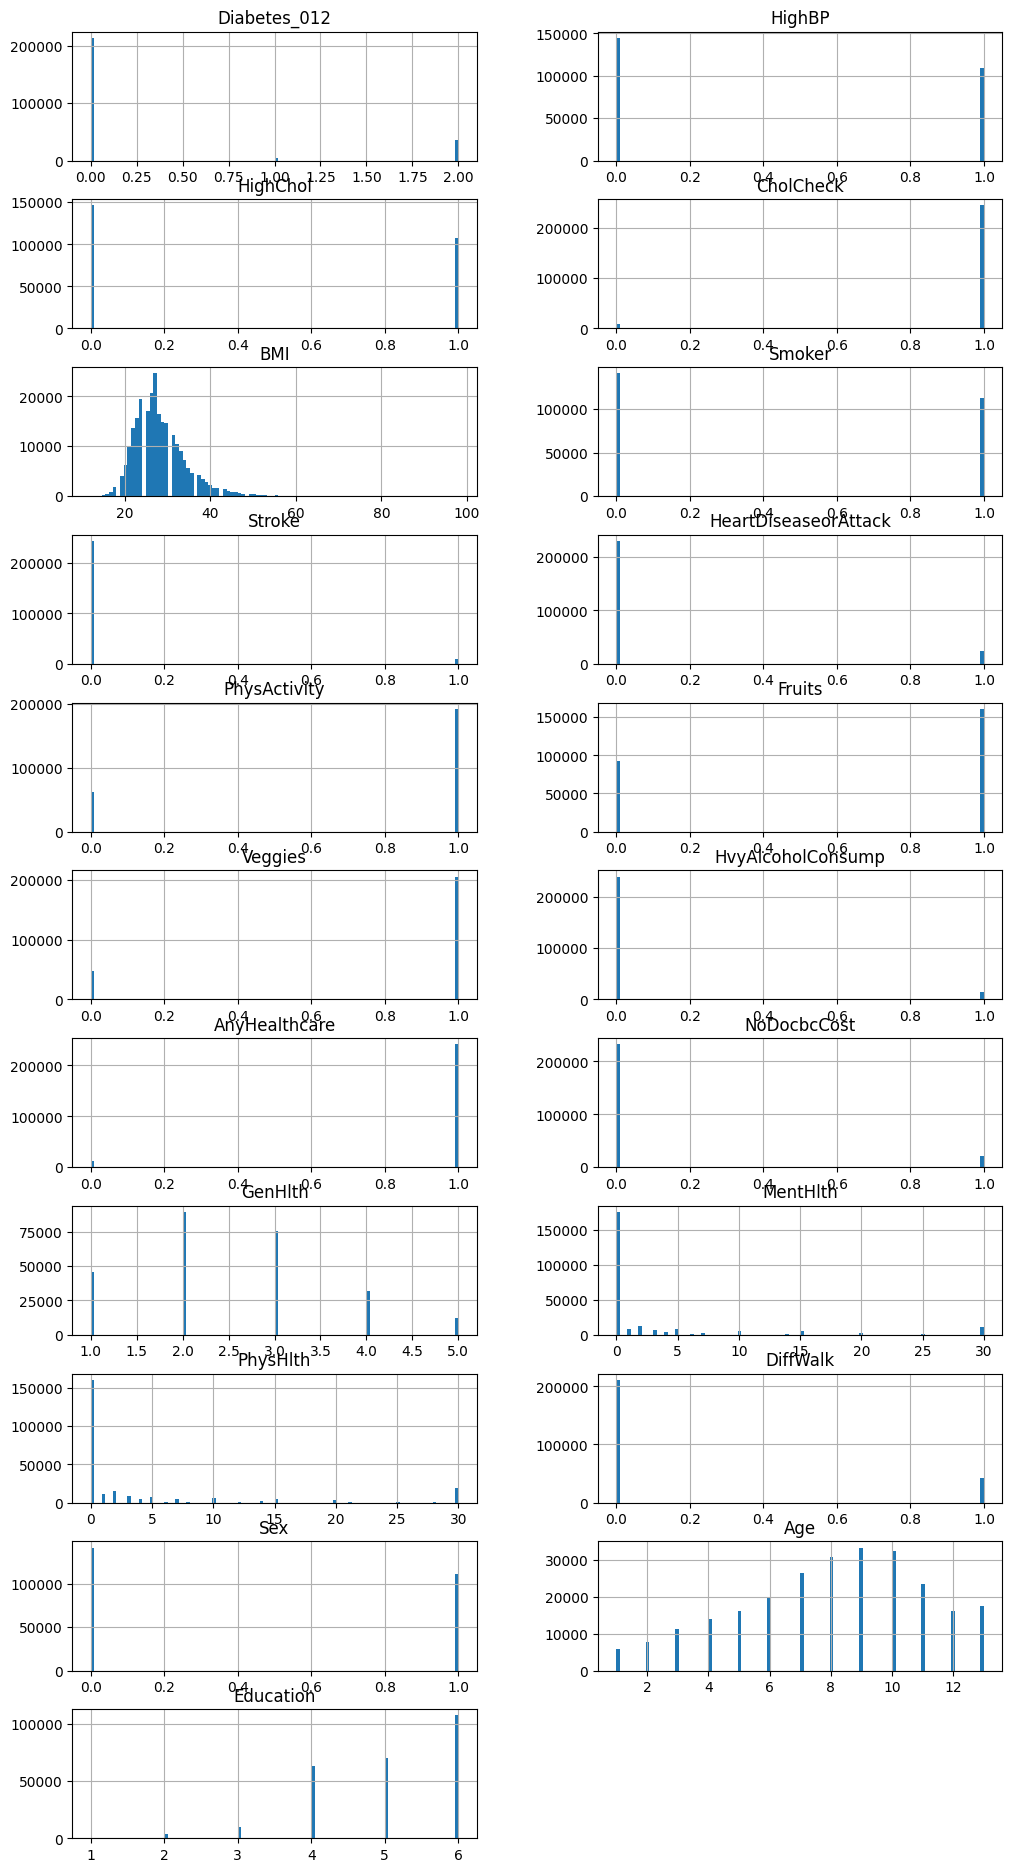

In [19]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
# Histogram of first 8 columns

## Identify Correlation in data

In [20]:
pdata.corr() # It will show correlation matrix

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [21]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

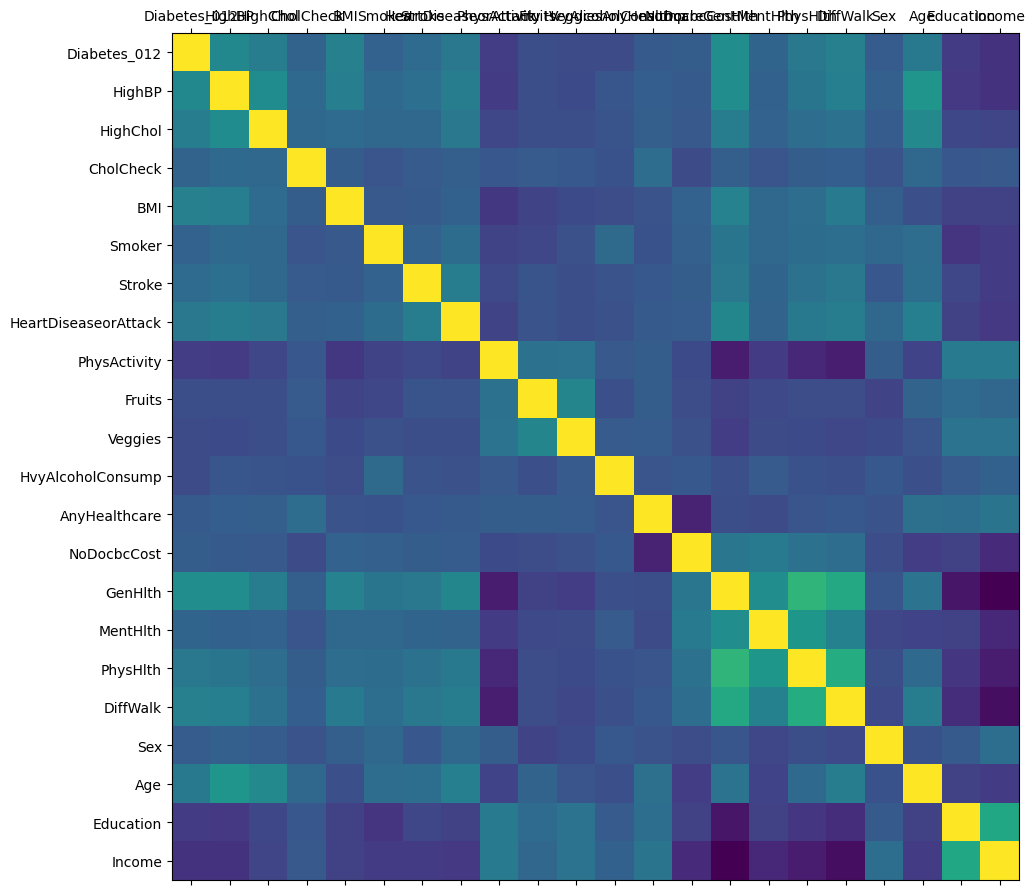

In [22]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

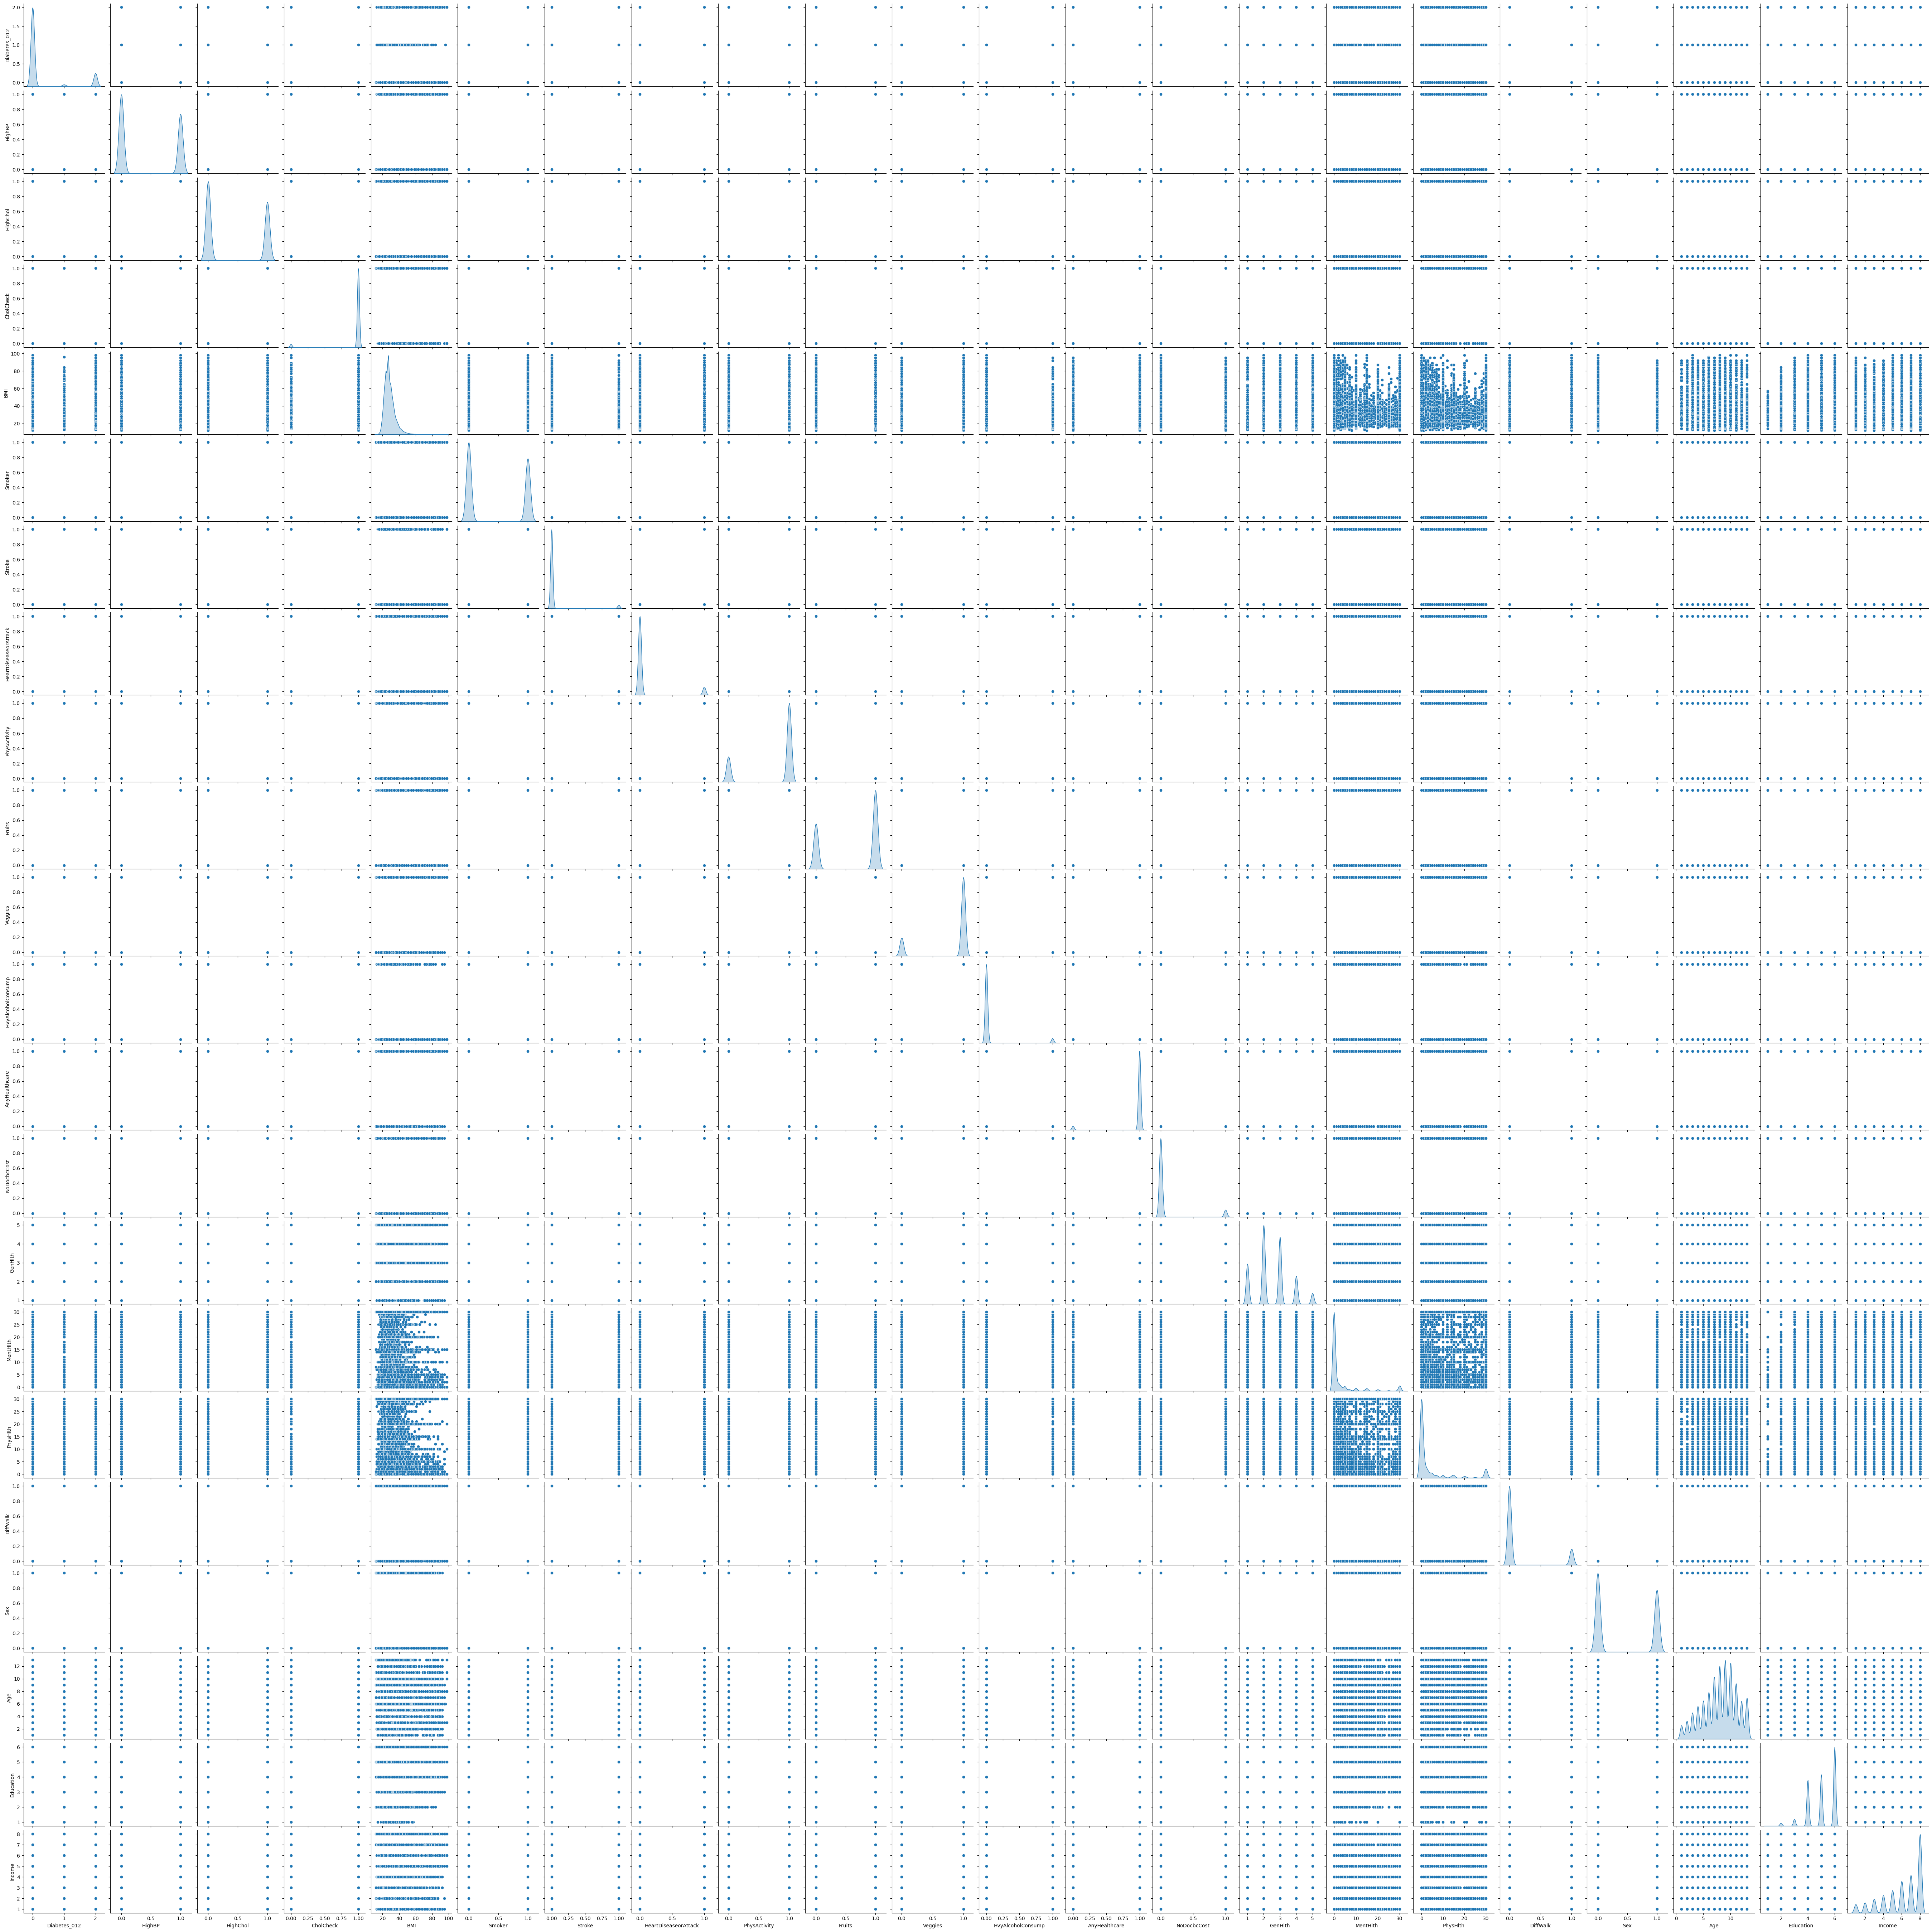

In [23]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate HighBp in Given dataset of True/False from outcome variable

In [26]:
n_true = len(pdata.loc[pdata['HighBP'] == True])
n_false = len(pdata.loc[pdata['HighBP'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 108829 (42.90%)
Number of false cases: 144851 (57.10%)


So we have 42.90% people in current data set who have HighBP and rest of 57.10% doesn't have HighBP.

Its a good distribution True/False cases of HighBP in data.

## Spliting the data
We will use 80% of data for training and 20% for testing.

In [28]:
from sklearn.model_selection import train_test_split

X = pdata.drop('HighBP',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['HighBP']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,Diabetes_012,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
164505,0.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,5.0,8.0
75594,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,15.0,3.0,1.0,0.0,9.0,6.0,7.0
86175,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,6.0
194093,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,13.0,6.0,6.0
187773,2.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,10.0,6.0,8.0


Lets check split of data

In [29]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

80.00% data is in training set
20.00% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [30]:
x_train.head()

,Diabetes_012,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
164505,0.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,5.0,8.0
75594,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,15.0,3.0,1.0,0.0,9.0,6.0,7.0
86175,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,6.0
194093,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,13.0,6.0,6.0
187773,2.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,10.0,6.0,8.0


In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 164505 to 128037
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          202944 non-null  float64
 1   HighChol              202944 non-null  float64
 2   CholCheck             202944 non-null  float64
 3   BMI                   202944 non-null  float64
 4   Smoker                202944 non-null  float64
 5   Stroke                202944 non-null  float64
 6   HeartDiseaseorAttack  202944 non-null  float64
 7   PhysActivity          202944 non-null  float64
 8   Fruits                202944 non-null  float64
 9   Veggies               202944 non-null  float64
 10  HvyAlcoholConsump     202944 non-null  float64
 11  AnyHealthcare         202944 non-null  float64
 12  NoDocbcCost           202944 non-null  float64
 13  GenHlth               202944 non-null  float64
 14  MentHlth              202944 non-null  float64
 15  

We can see lots of 0 entries above.

### Replace 0s with serial mean

In [32]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer

# Identify numeric columns
numeric_cols = x_train.select_dtypes(include=['number']).columns

# Impute missing values for numeric columns
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
x_train_numeric = pd.DataFrame(rep_0.fit_transform(x_train[numeric_cols]))
x_test_numeric = pd.DataFrame(rep_0.transform(x_test[numeric_cols]))

# Assign column names back
x_train_numeric.columns = numeric_cols
x_test_numeric.columns = numeric_cols

# Combine imputed numeric columns with non-numeric columns
x_train_imputed = pd.concat([x_train_numeric, x_train.select_dtypes(exclude=['number'])], axis=1)
x_test_imputed = pd.concat([x_test_numeric, x_test.select_dtypes(exclude=['number'])], axis=1)

# Now x_train_imputed and x_test_imputed contain the imputed data


# Logistic Regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


# Define preprocessing steps
numeric_features = x_train.select_dtypes(include=['number']).columns
categorical_features = x_train.select_dtypes(exclude=['number']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(x_train, y_train)

# Predict on test data
y_predict = clf.predict(x_test)

# Get the coefficients
coefficients = clf.named_steps['classifier'].coef_
intercept = clf.named_steps['classifier'].intercept_


In [40]:
from sklearn.metrics import accuracy_score

# Preprocess the test data using the same preprocessing steps as the training data
try:
    x_test_processed = clf.named_steps['preprocessor'].transform(x_test)
except Exception as e:
    print("Error during preprocessing:", e)

# Ensure that the preprocessed test data and target labels have compatible dimensions
if x_test_processed.shape[0] != len(y_test):
    print("Error: Dimensions of preprocessed test data and target labels don't match")
    # Additional debugging steps if needed

# Calculate the model score using the preprocessed test data
try:
    model_score = model.score(x_test_processed, y_test)
    print("Model Score:", model_score)
except Exception as e:
    print("Error calculating model score:", e)

# Alternatively, you can use the accuracy_score function from sklearn.metrics
try:
    y_pred = model.predict(x_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy)
except Exception as e:
    print("Error calculating accuracy score:", e)


Error calculating model score: name 'model' is not defined
Error calculating accuracy score: name 'model' is not defined


<Axes: >

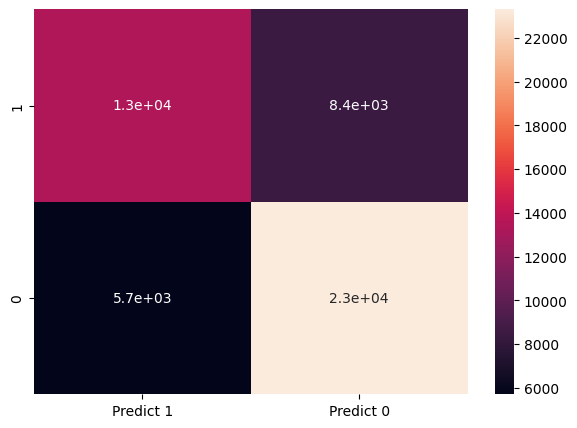

In [43]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes health indicator 48

True Negatives (TN): we correctly predicted that they don't have diabetes health indicator 132

False Positives (FP): we incorrectly predicted that they do have diabetes health indicator (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes health indicator (a "Type II error") 37 Falsely predict negative Type II error